In [1]:
import numpy as np
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from src.models.model import VSpyct
from src.utils import (calculate_bs, fix_predictions, plot_brier)
from src.data.dataset import SurvivalDataset

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = SurvivalDataset(fname='pbc.rda', path='../data/raw/')
print(data.dataset.head())
X_train, X_test, y_train, y_test = data.get_tensors()

   id  time  status trt        age sex ascites hepato spiders  edema  bili  \
0   1   400       2   1  58.765229   f       1      1       1    1.0  14.5   
1   2  4500       0   1  56.446270   f       0      1       1    0.0   1.1   
2   3  1012       2   1  70.072553   m       0      0       0    0.5   1.4   
3   4  1925       2   1  54.740589   f       0      1       1    0.5   1.8   
4   5  1504       1   2  38.105407   f       0      1       1    0.0   3.4   

  chol  albumin copper  alk.phos     ast trig platelet  protime stage  
0  261     2.60    156    1718.0  137.95  172      190     12.2     4  
1  302     4.14     54    7394.8  113.52   88      221     10.6     3  
2  176     3.48    210     516.0   96.10   55      151     12.0     4  
3  244     2.54     64    6121.8   60.63   92      183     10.3     4  
4  279     3.53    143     671.0  113.15   72      136     10.9     3  
Succesfully created time tensor of shape: torch.Size([418, 4795])
(334, 769) torch.Size([334, 4795]

In [3]:
model = VSpyct(max_depth=3, bs=64)
model.fit(X_train, y_train)

Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   2%|▏         | 3/150 [00:00<00:17,  8.23it/s]

[iteration 0001] loss: 589530544947.2000
[iteration 0002] loss: 554998399795.2000
[iteration 0003] loss: 502093874380.7999


Epochs:   3%|▎         | 5/150 [00:00<00:14, 10.13it/s]

[iteration 0004] loss: 457632395468.7999
[iteration 0005] loss: 422885089689.6000
[iteration 0006] loss: 383460874240.0001


Epochs:   6%|▌         | 9/150 [00:00<00:11, 11.90it/s]

[iteration 0007] loss: 354904971878.4000
[iteration 0008] loss: 322530912972.8000
[iteration 0009] loss: 290964858163.2000


Epochs:   7%|▋         | 11/150 [00:01<00:11, 12.40it/s]

[iteration 0010] loss: 277765404979.2000
[iteration 0011] loss: 244269974016.0000
[iteration 0012] loss: 224753893324.8000


Epochs:  10%|█         | 15/150 [00:01<00:10, 12.88it/s]

[iteration 0013] loss: 208935292518.4000
[iteration 0014] loss: 198889090048.0000
[iteration 0015] loss: 175914561689.6000


Epochs:  11%|█▏        | 17/150 [00:01<00:10, 13.06it/s]

[iteration 0016] loss: 163431346713.6000
[iteration 0017] loss: 149684993875.2000
[iteration 0018] loss: 138354329088.0000


Epochs:  14%|█▍        | 21/150 [00:01<00:09, 13.21it/s]

[iteration 0019] loss: 130337639209.6000
[iteration 0020] loss: 124265316978.8000
[iteration 0021] loss: 116515116992.0000


Epochs:  15%|█▌        | 23/150 [00:01<00:09, 13.31it/s]

[iteration 0022] loss: 107751358959.8000
[iteration 0023] loss: 102619363593.3000
[iteration 0024] loss: 98129343112.7250


Epochs:  18%|█▊        | 27/150 [00:02<00:09, 13.36it/s]

[iteration 0025] loss: 90112179877.2000
[iteration 0026] loss: 86522130637.1719
[iteration 0027] loss: 79921900488.9000


Epochs:  19%|█▉        | 29/150 [00:02<00:09, 13.01it/s]

[iteration 0028] loss: 75156453943.8763
[iteration 0029] loss: 73938172791.9605
[iteration 0030] loss: 71737831453.2953


Epochs:  22%|██▏       | 33/150 [00:02<00:09, 12.79it/s]

[iteration 0031] loss: 67179738029.0000
[iteration 0032] loss: 66587949011.2000
[iteration 0033] loss: 64676959812.4000


Epochs:  23%|██▎       | 35/150 [00:02<00:09, 12.77it/s]

[iteration 0034] loss: 60557123448.5270
[iteration 0035] loss: 60084863949.4000
[iteration 0036] loss: 56888699507.0174


Epochs:  26%|██▌       | 39/150 [00:03<00:08, 12.93it/s]

[iteration 0037] loss: 56264678012.8000
[iteration 0038] loss: 55340161427.1500
[iteration 0039] loss: 54858247888.9977


Epochs:  27%|██▋       | 41/150 [00:03<00:08, 12.80it/s]

[iteration 0040] loss: 53478978573.4250
[iteration 0041] loss: 51209497524.4598
[iteration 0042] loss: 52084353174.9656


Epochs:  30%|███       | 45/150 [00:03<00:08, 11.99it/s]

[iteration 0043] loss: 52239769194.3500
[iteration 0044] loss: 50894004883.6289
[iteration 0045] loss: 49219355342.4979


Epochs:  31%|███▏      | 47/150 [00:03<00:08, 12.16it/s]

[iteration 0046] loss: 47873898901.0000
[iteration 0047] loss: 48969118124.5500
[iteration 0048] loss: 47419677318.7006


Epochs:  34%|███▍      | 51/150 [00:04<00:07, 12.43it/s]

[iteration 0049] loss: 48855064003.3734
[iteration 0050] loss: 48102682027.0000
[iteration 0051] loss: 46261697437.9500


Epochs:  35%|███▌      | 53/150 [00:04<00:07, 12.56it/s]

[iteration 0052] loss: 46576672158.5500
[iteration 0053] loss: 45304664010.8250
[iteration 0054] loss: 46592441833.4938


Epochs:  38%|███▊      | 57/150 [00:04<00:07, 12.55it/s]

[iteration 0055] loss: 47257126916.9000
[iteration 0056] loss: 45294617485.5547
[iteration 0057] loss: 44597113119.8625


Epochs:  39%|███▉      | 59/150 [00:04<00:07, 12.18it/s]


[iteration 0058] loss: 46902989219.4500
[iteration 0059] loss: 46754281703.4125
Early stopping at epoch 59.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
torch.Size([334, 769])
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   5%|▌         | 8/150 [00:00<00:03, 38.27it/s]

[iteration 0001] loss: 332596864614.4000
[iteration 0002] loss: 326620928409.6000
[iteration 0003] loss: 327361904640.0000
[iteration 0004] loss: 310908729753.6000
[iteration 0005] loss: 303309556940.8000
[iteration 0006] loss: 298748448768.0000
[iteration 0007] loss: 292363247616.0000
[iteration 0008] loss: 283114979328.0000


Epochs:  11%|█         | 16/150 [00:00<00:03, 37.51it/s]

[iteration 0009] loss: 275593424896.0000
[iteration 0010] loss: 264117144780.8000
[iteration 0011] loss: 262849599897.6000
[iteration 0012] loss: 263825031168.0000
[iteration 0013] loss: 253561800294.4000
[iteration 0014] loss: 244904306278.4000
[iteration 0015] loss: 237567285657.6000
[iteration 0016] loss: 231607237836.8000


Epochs:  16%|█▌        | 24/150 [00:00<00:03, 37.67it/s]

[iteration 0017] loss: 229550869708.8000
[iteration 0018] loss: 220335040102.4000
[iteration 0019] loss: 211847957708.8000
[iteration 0020] loss: 208806776832.0000
[iteration 0021] loss: 202224599040.0000
[iteration 0022] loss: 194481487052.8000
[iteration 0023] loss: 186212832870.4000
[iteration 0024] loss: 189400927846.4000


Epochs:  21%|██▏       | 32/150 [00:00<00:03, 38.05it/s]

[iteration 0025] loss: 177366218342.4000
[iteration 0026] loss: 178956399820.8000
[iteration 0027] loss: 168790851584.0000
[iteration 0028] loss: 165800791244.8000
[iteration 0029] loss: 158687122227.2000
[iteration 0030] loss: 160713160294.4000
[iteration 0031] loss: 160666736230.4000
[iteration 0032] loss: 152094833868.8000


Epochs:  27%|██▋       | 40/150 [00:01<00:02, 38.04it/s]

[iteration 0033] loss: 144589412352.0000
[iteration 0034] loss: 141489408000.0000
[iteration 0035] loss: 137839735603.2000
[iteration 0036] loss: 135757844480.0000
[iteration 0037] loss: 134021618483.2000
[iteration 0038] loss: 126941092659.2000
[iteration 0039] loss: 129805429555.2000
[iteration 0040] loss: 119194707558.4000


Epochs:  32%|███▏      | 48/150 [00:01<00:02, 38.11it/s]

[iteration 0041] loss: 118322373836.8000
[iteration 0042] loss: 114717779968.0000
[iteration 0043] loss: 104106517504.0000
[iteration 0044] loss: 103654219366.4000
[iteration 0045] loss: 107076013670.4000
[iteration 0046] loss: 101998192640.0000
[iteration 0047] loss: 103484033228.8000
[iteration 0048] loss: 99565493862.4000


Epochs:  37%|███▋      | 56/150 [00:01<00:02, 38.09it/s]

[iteration 0049] loss: 95273348300.8000
[iteration 0050] loss: 92115708518.4000
[iteration 0051] loss: 94722839961.6000
[iteration 0052] loss: 87934665318.4000
[iteration 0053] loss: 83715235225.6000
[iteration 0054] loss: 86981751193.6000
[iteration 0055] loss: 83788462080.0000
[iteration 0056] loss: 78197926912.0000


Epochs:  43%|████▎     | 64/150 [00:01<00:02, 38.30it/s]

[iteration 0057] loss: 76297002598.4000
[iteration 0058] loss: 75551323136.0000
[iteration 0059] loss: 73712275251.2000
[iteration 0060] loss: 70072831385.6000
[iteration 0061] loss: 71592164556.8000
[iteration 0062] loss: 65050360422.4000
[iteration 0063] loss: 68571924480.0000
[iteration 0064] loss: 62740806860.8000


Epochs:  48%|████▊     | 72/150 [00:01<00:02, 38.21it/s]

[iteration 0065] loss: 64633350348.8000
[iteration 0066] loss: 61238580838.4000
[iteration 0067] loss: 58471878451.2000
[iteration 0068] loss: 58651118182.4000
[iteration 0069] loss: 55036086476.8000
[iteration 0070] loss: 55544066048.0000
[iteration 0071] loss: 55098946150.4000
[iteration 0072] loss: 52236837888.0000


Epochs:  53%|█████▎    | 80/150 [00:02<00:01, 38.22it/s]

[iteration 0073] loss: 50562398924.8000
[iteration 0074] loss: 47081678233.6000
[iteration 0075] loss: 50386476134.4000
[iteration 0076] loss: 45612160409.6000
[iteration 0077] loss: 42806872780.8000
[iteration 0078] loss: 46030306508.8000
[iteration 0079] loss: 43657382092.8000
[iteration 0080] loss: 41075488051.2000


Epochs:  59%|█████▊    | 88/150 [00:02<00:01, 38.25it/s]

[iteration 0081] loss: 40152609484.8000
[iteration 0082] loss: 40969553715.2000
[iteration 0083] loss: 38761822105.6000
[iteration 0084] loss: 38118172774.4000
[iteration 0085] loss: 36792283545.6000
[iteration 0086] loss: 36291592294.4000
[iteration 0087] loss: 31744184832.0000
[iteration 0088] loss: 33932852633.6000


Epochs:  59%|█████▉    | 89/150 [00:02<00:01, 37.57it/s]


[iteration 0089] loss: 31821402521.6000
Early stopping at epoch 89.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
torch.Size([125, 769])
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   3%|▎         | 5/150 [00:00<00:03, 44.13it/s]

[iteration 0001] loss: 63886739353.6000
[iteration 0002] loss: 61111583948.8000
[iteration 0003] loss: 59663863398.4000
[iteration 0004] loss: 56139058688.0000
[iteration 0005] loss: 56940767539.2000
[iteration 0006] loss: 52329872076.8000


Epochs:   7%|▋         | 10/150 [00:00<00:03, 44.40it/s]

[iteration 0007] loss: 52475112550.4000
[iteration 0008] loss: 48724497408.0000
[iteration 0009] loss: 49803304550.4000
[iteration 0010] loss: 47288553062.4000


Epochs:  10%|█         | 15/150 [00:00<00:03, 44.78it/s]

[iteration 0011] loss: 46241203916.8000
[iteration 0012] loss: 44369315225.6000
[iteration 0013] loss: 41845229158.4000
[iteration 0014] loss: 42378894028.8000
[iteration 0015] loss: 41318288588.8000
[iteration 0016] loss: 38115463577.6000


Epochs:  13%|█▎        | 20/150 [00:00<00:02, 44.48it/s]

[iteration 0017] loss: 38264786124.8000
[iteration 0018] loss: 36402604851.2000
[iteration 0019] loss: 37929108582.4000
[iteration 0020] loss: 35522243276.8000


Epochs:  17%|█▋        | 25/150 [00:00<00:02, 44.78it/s]

[iteration 0021] loss: 34594604851.2000
[iteration 0022] loss: 32968654438.4000
[iteration 0023] loss: 32200292454.4000
[iteration 0024] loss: 30665148211.2000
[iteration 0025] loss: 30314938982.4000
[iteration 0026] loss: 29150545715.2000


Epochs:  20%|██        | 30/150 [00:00<00:02, 44.49it/s]

[iteration 0027] loss: 28666616627.2000
[iteration 0028] loss: 28434100633.6000
[iteration 0029] loss: 26104137830.4000
[iteration 0030] loss: 25358013952.0000


Epochs:  23%|██▎       | 35/150 [00:00<00:02, 44.77it/s]

[iteration 0031] loss: 26054384128.0000
[iteration 0032] loss: 23108220416.0000
[iteration 0033] loss: 24085123891.2000
[iteration 0034] loss: 22747633408.0000
[iteration 0035] loss: 22274294579.2000
[iteration 0036] loss: 22678243788.8000
[iteration 0037] loss: 21758769100.8000
[iteration 0038] loss: 19823497164.8000


Epochs:  27%|██▋       | 40/150 [00:00<00:02, 39.84it/s]

[iteration 0039] loss: 20366877747.2000
[iteration 0040] loss: 18561714073.6000
[iteration 0041] loss: 18742314649.6000
[iteration 0042] loss: 18739970867.2000
[iteration 0043] loss: 17391325798.4000


Epochs:  30%|███       | 45/150 [00:01<00:02, 41.12it/s]

[iteration 0044] loss: 17416604620.8000
[iteration 0045] loss: 16655880192.0000
[iteration 0046] loss: 16278260249.6000
[iteration 0047] loss: 15806212147.2000


Epochs:  33%|███▎      | 50/150 [00:01<00:02, 41.79it/s]

[iteration 0048] loss: 15972614809.6000
[iteration 0049] loss: 15690429516.8000
[iteration 0050] loss: 15479750144.0000
[iteration 0051] loss: 14676641945.6000
[iteration 0052] loss: 14274482483.2000


Epochs:  37%|███▋      | 55/150 [00:01<00:02, 42.50it/s]

[iteration 0053] loss: 14574446489.6000
[iteration 0054] loss: 14028713676.8000
[iteration 0055] loss: 13273788800.0000
[iteration 0056] loss: 12858098790.4000


Epochs:  40%|████      | 60/150 [00:01<00:02, 42.99it/s]

[iteration 0057] loss: 13548012544.0000
[iteration 0058] loss: 12744619238.4000
[iteration 0059] loss: 12625237619.2000
[iteration 0060] loss: 11990649766.4000
[iteration 0061] loss: 12629393331.2000


Epochs:  43%|████▎     | 65/150 [00:01<00:01, 43.27it/s]

[iteration 0062] loss: 11305997644.8000
[iteration 0063] loss: 11188245529.6000
[iteration 0064] loss: 10859387683.2000
[iteration 0065] loss: 10499602598.4000


Epochs:  47%|████▋     | 70/150 [00:01<00:01, 43.55it/s]

[iteration 0066] loss: 10247294995.2000
[iteration 0067] loss: 10925058905.6000
[iteration 0068] loss: 10539714086.4000
[iteration 0069] loss: 9832914470.4000
[iteration 0070] loss: 9490590361.6000


Epochs:  48%|████▊     | 72/150 [00:01<00:01, 42.60it/s]


[iteration 0071] loss: 10094052662.4000
[iteration 0072] loss: 9800433763.2000
Early stopping at epoch 72.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
torch.Size([66, 769])
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 198759369932.8000


Epochs:   5%|▌         | 8/150 [00:00<00:01, 72.55it/s]

[iteration 0002] loss: 199811779788.8000
[iteration 0003] loss: 200811098931.2000
[iteration 0004] loss: 189215159091.2000
[iteration 0005] loss: 186866278400.0000
[iteration 0006] loss: 194357316812.8000
[iteration 0007] loss: 198220329779.2000
[iteration 0008] loss: 184834901606.4000
[iteration 0009] loss: 182626274508.8000
[iteration 0010] loss: 179788490342.4000
[iteration 0011] loss: 173541493964.8000
[iteration 0012] loss: 170384356147.2000
[iteration 0013] loss: 176242152243.2000
[iteration 0014] loss: 172367678668.8000
[iteration 0015] loss: 169644688998.4000
[iteration 0016] loss: 167956532428.8000


Epochs:  11%|█         | 16/150 [00:00<00:01, 74.01it/s]

[iteration 0017] loss: 171146603724.8000


Epochs:  16%|█▌        | 24/150 [00:00<00:01, 74.65it/s]

[iteration 0018] loss: 164847501312.0000
[iteration 0019] loss: 163947347968.0000
[iteration 0020] loss: 163977311027.2000
[iteration 0021] loss: 158874286489.6000
[iteration 0022] loss: 157933646643.2000
[iteration 0023] loss: 155050300211.2000
[iteration 0024] loss: 159441218764.8000
[iteration 0025] loss: 153286366822.4000
[iteration 0026] loss: 150588751872.0000


Epochs:  21%|██        | 31/150 [00:00<00:01, 72.30it/s]

[iteration 0027] loss: 149637996544.0000
[iteration 0028] loss: 147094647603.2000
[iteration 0029] loss: 143223284531.2000
[iteration 0030] loss: 148554073702.4000
[iteration 0031] loss: 144207413248.0000
Early stopping at epoch 31.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
torch.Size([59, 769])
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)

Epochs:   1%|▏         | 2/150 [00:00<00:07, 19.37it/s]

[iteration 0001] loss: 230810114457.6000
[iteration 0002] loss: 212335455436.8000
[iteration 0003] loss: 198372308275.2000


Epochs:   3%|▎         | 4/150 [00:00<00:07, 19.33it/s]

[iteration 0004] loss: 190365550284.8000


Epochs:   4%|▍         | 6/150 [00:00<00:07, 18.44it/s]

[iteration 0005] loss: 172130048512.0000
[iteration 0006] loss: 162308867379.2000
[iteration 0007] loss: 160988637849.6000


Epochs:   5%|▌         | 8/150 [00:00<00:07, 18.66it/s]

[iteration 0008] loss: 142381077555.2000


Epochs:   7%|▋         | 10/150 [00:00<00:07, 18.73it/s]

[iteration 0009] loss: 133915034777.6000
[iteration 0010] loss: 121706894105.6000
[iteration 0011] loss: 121591857638.4000


Epochs:   8%|▊         | 12/150 [00:00<00:07, 18.85it/s]

[iteration 0012] loss: 108931770265.6000


Epochs:   9%|▉         | 14/150 [00:00<00:07, 18.93it/s]

[iteration 0013] loss: 104246353715.2000
[iteration 0014] loss: 101231611353.6000
[iteration 0015] loss: 95385260032.0000


Epochs:  11%|█         | 16/150 [00:00<00:07, 19.02it/s]

[iteration 0016] loss: 89008785972.4000


Epochs:  12%|█▏        | 18/150 [00:00<00:06, 19.01it/s]

[iteration 0017] loss: 84382458406.0000
[iteration 0018] loss: 82010534124.1000
[iteration 0019] loss: 74686189328.8000


Epochs:  13%|█▎        | 20/150 [00:01<00:06, 18.91it/s]

[iteration 0020] loss: 72257090571.7656


Epochs:  15%|█▍        | 22/150 [00:01<00:06, 18.87it/s]

[iteration 0021] loss: 71727836702.1000
[iteration 0022] loss: 68345164755.3219
[iteration 0023] loss: 66108631890.4500


Epochs:  16%|█▌        | 24/150 [00:01<00:06, 18.94it/s]

[iteration 0024] loss: 62173195896.2938


Epochs:  17%|█▋        | 26/150 [00:01<00:06, 19.00it/s]

[iteration 0025] loss: 62272518336.3109
[iteration 0026] loss: 59281160122.9000
[iteration 0027] loss: 57937062143.9000


Epochs:  19%|█▊        | 28/150 [00:01<00:06, 19.03it/s]

[iteration 0028] loss: 56401722860.9750


Epochs:  20%|██        | 30/150 [00:01<00:06, 19.06it/s]

[iteration 0029] loss: 54856706328.7500
[iteration 0030] loss: 53403757232.9984
[iteration 0031] loss: 51654771316.7250


Epochs:  21%|██▏       | 32/150 [00:01<00:06, 19.03it/s]

[iteration 0032] loss: 51317584018.5000


Epochs:  23%|██▎       | 34/150 [00:01<00:06, 19.04it/s]

[iteration 0033] loss: 51492369492.0930
[iteration 0034] loss: 50363379262.9500
[iteration 0035] loss: 48895092477.6906


Epochs:  24%|██▍       | 36/150 [00:01<00:05, 19.03it/s]

[iteration 0036] loss: 47879251588.1500


Epochs:  25%|██▌       | 38/150 [00:02<00:05, 19.04it/s]

[iteration 0037] loss: 48061044372.0000
[iteration 0038] loss: 47310586954.3000
[iteration 0039] loss: 46108485148.2000


Epochs:  27%|██▋       | 40/150 [00:02<00:05, 19.06it/s]

[iteration 0040] loss: 46294427307.8000


Epochs:  28%|██▊       | 42/150 [00:02<00:05, 19.10it/s]

[iteration 0041] loss: 46548205117.6000
[iteration 0042] loss: 44429312120.6000
[iteration 0043] loss: 46552762590.4000


Epochs:  29%|██▉       | 44/150 [00:02<00:05, 19.10it/s]

[iteration 0044] loss: 45790232128.6313


Epochs:  29%|██▉       | 44/150 [00:02<00:05, 18.56it/s]


Early stopping at epoch 44.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
torch.Size([209, 769])
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 128184369766.4000
[iteration 0002] loss: 116736895385.6000


Epochs:   3%|▎         | 4/150 [00:00<00:03, 36.73it/s]

[iteration 0003] loss: 114402822656.0000
[iteration 0004] loss: 112339449548.8000
[iteration 0005] loss: 105424859750.4000
[iteration 0006] loss: 103163941068.8000


Epochs:   5%|▌         | 8/150 [00:00<00:03, 36.68it/s]

[iteration 0007] loss: 104469837926.4000
[iteration 0008] loss: 99066702028.8000
[iteration 0009] loss: 91072684339.2000
[iteration 0010] loss: 89592677171.2000


Epochs:   8%|▊         | 12/150 [00:00<00:03, 36.53it/s]

[iteration 0011] loss: 88712887808.0000
[iteration 0012] loss: 83271699097.6000
[iteration 0013] loss: 83075681536.0000
[iteration 0014] loss: 82953588889.6000


Epochs:  11%|█         | 16/150 [00:00<00:03, 36.78it/s]

[iteration 0015] loss: 78428940134.4000
[iteration 0016] loss: 73543908505.6000
[iteration 0017] loss: 74070012160.0000
[iteration 0018] loss: 69092991667.2000


Epochs:  13%|█▎        | 20/150 [00:00<00:03, 37.22it/s]

[iteration 0019] loss: 69917746918.4000
[iteration 0020] loss: 66324891033.6000
[iteration 0021] loss: 65278048064.0000
[iteration 0022] loss: 62814709273.6000


Epochs:  16%|█▌        | 24/150 [00:00<00:03, 37.09it/s]

[iteration 0023] loss: 60841666880.0000
[iteration 0024] loss: 58523274880.0000
[iteration 0025] loss: 57408117785.6000
[iteration 0026] loss: 56865468902.4000


Epochs:  19%|█▊        | 28/150 [00:00<00:03, 37.10it/s]

[iteration 0027] loss: 54342811686.4000
[iteration 0028] loss: 51840089292.8000
[iteration 0029] loss: 51926140556.8000
[iteration 0030] loss: 49781191244.8000


Epochs:  21%|██▏       | 32/150 [00:00<00:03, 36.94it/s]

[iteration 0031] loss: 48613551276.8000
[iteration 0032] loss: 48026616921.6000
[iteration 0033] loss: 46842239880.8000
[iteration 0034] loss: 45844718624.0000


Epochs:  24%|██▍       | 36/150 [00:00<00:03, 37.17it/s]

[iteration 0035] loss: 47327906009.6000
[iteration 0036] loss: 42759993609.8313
[iteration 0037] loss: 43712923302.2500
[iteration 0038] loss: 41346770104.6563


Epochs:  27%|██▋       | 40/150 [00:01<00:02, 36.94it/s]

[iteration 0039] loss: 40908800987.0750
[iteration 0040] loss: 40191027886.1500
[iteration 0041] loss: 38915153377.7000
[iteration 0042] loss: 36937228137.8500


Epochs:  29%|██▉       | 44/150 [00:01<00:02, 37.12it/s]

[iteration 0043] loss: 35574040658.6000
[iteration 0044] loss: 35145507800.3813
[iteration 0045] loss: 37797129976.3000
[iteration 0046] loss: 33166813676.4000


Epochs:  32%|███▏      | 48/150 [00:01<00:02, 35.81it/s]

[iteration 0047] loss: 34791497574.9000
[iteration 0048] loss: 31964272441.9250
[iteration 0049] loss: 32851204238.7477
[iteration 0050] loss: 31444452600.5500


Epochs:  35%|███▍      | 52/150 [00:01<00:02, 36.37it/s]

[iteration 0051] loss: 33597406261.7750
[iteration 0052] loss: 31825300660.0000
[iteration 0053] loss: 31392534012.8000
[iteration 0054] loss: 31497858389.1103


Epochs:  37%|███▋      | 56/150 [00:01<00:02, 36.84it/s]

[iteration 0055] loss: 30838566688.0000
[iteration 0056] loss: 29308630245.5000
[iteration 0057] loss: 28827120861.2000
[iteration 0058] loss: 30191418168.8000


Epochs:  40%|████      | 60/150 [00:01<00:02, 36.78it/s]

[iteration 0059] loss: 28666018948.8000
[iteration 0060] loss: 29361038102.2602
[iteration 0061] loss: 30021383452.5000
[iteration 0062] loss: 28324016249.9000


Epochs:  43%|████▎     | 64/150 [00:01<00:02, 36.87it/s]

[iteration 0063] loss: 28992295283.2000
[iteration 0064] loss: 27064253779.2000
[iteration 0065] loss: 27113529721.6000
[iteration 0066] loss: 27013047318.4000


Epochs:  45%|████▌     | 68/150 [00:01<00:02, 36.76it/s]

[iteration 0067] loss: 27033817542.4000
[iteration 0068] loss: 26226353209.6000
[iteration 0069] loss: 25433376441.6000
[iteration 0070] loss: 26077646934.4000


Epochs:  48%|████▊     | 72/150 [00:01<00:02, 37.03it/s]

[iteration 0071] loss: 25852989664.0000
[iteration 0072] loss: 24014489580.8000
[iteration 0073] loss: 26483947705.6000
[iteration 0074] loss: 24844459097.6000


Epochs:  49%|████▉     | 74/150 [00:02<00:02, 36.34it/s]


Early stopping at epoch 74.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
torch.Size([103, 769])
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 195885649920.0000
[iteration 0002] loss: 195656001945.6000


Epochs:   3%|▎         | 4/150 [00:00<00:04, 36.46it/s]

[iteration 0003] loss: 190634304307.2000
[iteration 0004] loss: 183697131929.6000
[iteration 0005] loss: 184040890368.0000
[iteration 0006] loss: 175746828697.6000


Epochs:   5%|▌         | 8/150 [00:00<00:03, 36.65it/s]

[iteration 0007] loss: 174436039065.6000
[iteration 0008] loss: 168454239846.4000
[iteration 0009] loss: 169443015065.6000
[iteration 0010] loss: 161599578521.6000


Epochs:   8%|▊         | 12/150 [00:00<00:03, 36.46it/s]

[iteration 0011] loss: 155878988595.2000
[iteration 0012] loss: 146133682995.2000
[iteration 0013] loss: 144798167449.6000
[iteration 0014] loss: 141935883059.2000


Epochs:  11%|█         | 16/150 [00:00<00:03, 36.69it/s]

[iteration 0015] loss: 141579478630.4000
[iteration 0016] loss: 134492914892.8000
[iteration 0017] loss: 128150063104.0000
[iteration 0018] loss: 124219323596.8000


Epochs:  13%|█▎        | 20/150 [00:00<00:03, 36.80it/s]

[iteration 0019] loss: 119005478502.4000
[iteration 0020] loss: 119774263705.6000
[iteration 0021] loss: 115924225228.8000
[iteration 0022] loss: 112423083212.8000


Epochs:  16%|█▌        | 24/150 [00:00<00:03, 36.82it/s]

[iteration 0023] loss: 104998138675.2000
[iteration 0024] loss: 104880268492.8000
[iteration 0025] loss: 98929958912.0000
[iteration 0026] loss: 97617891532.8000


Epochs:  19%|█▊        | 28/150 [00:00<00:03, 36.52it/s]

[iteration 0027] loss: 94585246515.2000
[iteration 0028] loss: 93006070169.6000
[iteration 0029] loss: 91098924851.2000
[iteration 0030] loss: 91803118182.4000


Epochs:  21%|██▏       | 32/150 [00:00<00:03, 36.81it/s]

[iteration 0031] loss: 86609464729.6000
[iteration 0032] loss: 82335397683.2000
[iteration 0033] loss: 78519230259.2000
[iteration 0034] loss: 77785002188.8000


Epochs:  24%|██▍       | 36/150 [00:00<00:03, 36.77it/s]

[iteration 0035] loss: 73644509388.8000
[iteration 0036] loss: 76477641728.0000
[iteration 0037] loss: 71498084147.2000
[iteration 0038] loss: 68924758835.2000


Epochs:  27%|██▋       | 40/150 [00:01<00:02, 36.85it/s]

[iteration 0039] loss: 69223775027.2000
[iteration 0040] loss: 68709319475.2000
[iteration 0041] loss: 63447083417.6000
[iteration 0042] loss: 63402850406.4000


Epochs:  29%|██▉       | 44/150 [00:01<00:02, 36.84it/s]

[iteration 0043] loss: 62750798643.2000
[iteration 0044] loss: 62736297779.2000
[iteration 0045] loss: 57938127257.6000
[iteration 0046] loss: 59248121446.4000


Epochs:  32%|███▏      | 48/150 [00:01<00:02, 36.67it/s]

[iteration 0047] loss: 53515201945.6000
[iteration 0048] loss: 51877085081.6000
[iteration 0049] loss: 50926378700.8000
[iteration 0050] loss: 49483698790.4000


Epochs:  35%|███▍      | 52/150 [00:01<00:02, 36.77it/s]

[iteration 0051] loss: 48422395392.0000
[iteration 0052] loss: 47591986278.4000
[iteration 0053] loss: 44497318195.2000
[iteration 0054] loss: 44239995289.6000


Epochs:  37%|███▋      | 56/150 [00:01<00:02, 36.85it/s]

[iteration 0055] loss: 40817637478.4000
[iteration 0056] loss: 41773206937.6000


Epochs:  38%|███▊      | 57/150 [00:01<00:02, 36.11it/s]

[iteration 0057] loss: 42251368448.0000
Early stopping at epoch 57.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
torch.Size([106, 769])


In [4]:
preds = model.predict(X_test)

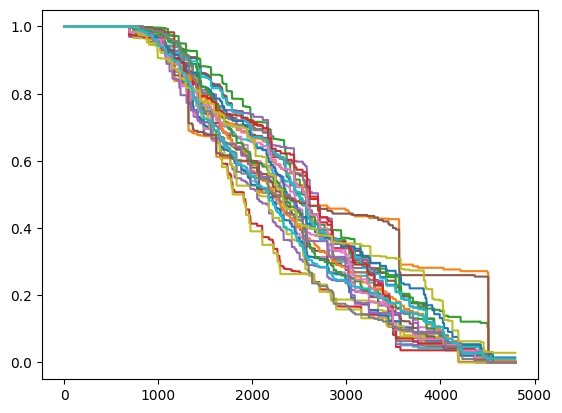

In [5]:
for i in range(30):
  plt.plot(preds.mean(axis=1)[i])

In [6]:
X_train, T_train, E_train, X_test, T_test, E_test = data.pysurvival_split()

In [7]:
avg_preds = preds.mean(axis=1)

In [8]:
avg_preds.shape

torch.Size([84, 4795])

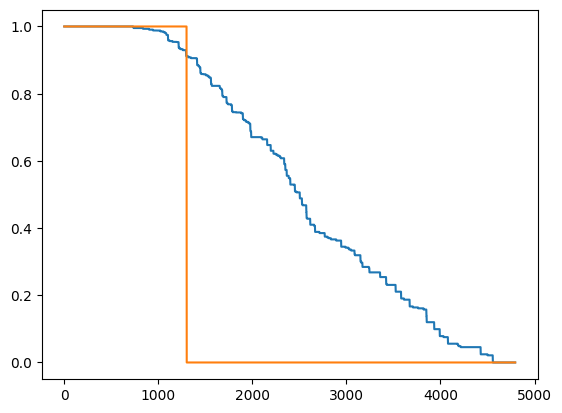

In [9]:
plt.plot(avg_preds[0])
plt.plot(y_test[0])

In [10]:
avg_preds.shape, y_test.shape

(torch.Size([84, 4795]), torch.Size([84, 4795]))

In [11]:
avg_preds

tensor([[1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000,  ..., 0.0034, 0.0034, 0.0034],
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [1.0000, 1.0000, 1.0000,  ..., 0.0011, 0.0011, 0.0011],
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000]])

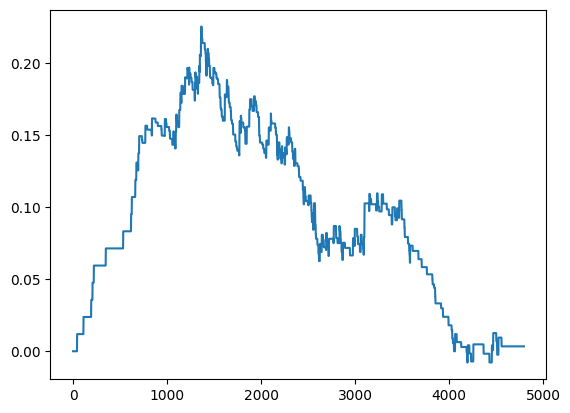

In [12]:
plt.plot(((avg_preds-np.nan_to_num(y_test, 0)**2).mean(axis=0)))

In [13]:
y_test.shape, avg_preds.shape

(torch.Size([84, 4795]), torch.Size([84, 4795]))

In [14]:
class Brier:
  def __init__(self, times, event_observed):
    from lifelines import KaplanMeierFitter
    self.times = times
    self.event_observed = event_observed
    self.num_events = sum(event_observed)
    self.kmf = KaplanMeierFitter()
    self.kmf.fit(self.times, self.event_observed)
    cumulative_censoring_probs = 1 - self.kmf.survival_function_.values
    self.ipcw_coeffs = (1 / cumulative_censoring_probs)[1:]

  def evaluate(self, times_arr, predicted_probs):
    if isinstance(times_arr, torch.Tensor): times_arr = times_arr.numpy()
    if isinstance(predicted_probs, torch.Tensor): predicted_probs = predicted_probs.numpy()
    print(np.power(times_arr - predicted_probs, 2).mean(axis=0).shape)
    brier_score = (self.ipcw_coeffs*np.power(times_arr - predicted_probs, 2)).mean(axis=0) / self.num_events
    return brier_score

(4795,)


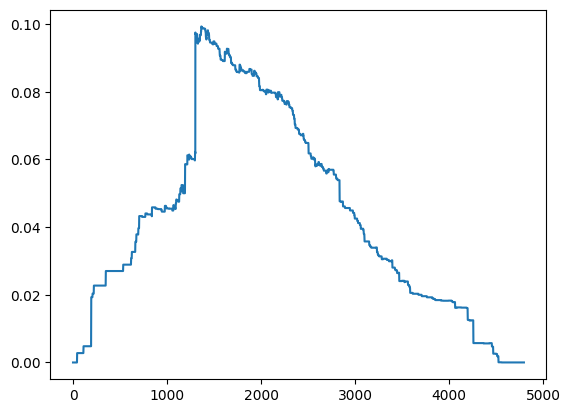

In [15]:
_bs_ = Brier(T_test, E_test)
bs_vspyct = _bs_.evaluate(y_test, avg_preds)
plt.plot(bs_vspyct)

In [3]:
# def brier_score_ipcw(times, times_arr, event_observed, predicted_probs):
#     from lifelines import KaplanMeierFitter
#     if isinstance(times_arr, torch.Tensor): times_arr = times_arr.numpy()
#     if isinstance(predicted_probs, torch.Tensor): predicted_probs = predicted_probs.numpy()
#     num_events = sum(event_observed)
#     kmf = KaplanMeierFitter()
#     kmf.fit(times, event_observed)
#     cumulative_censoring_probs = 1 - kmf.survival_function_.values
#     ipcw_coeffs = 1 / cumulative_censoring_probs
#     ipcw_coeffs = ipcw_coeffs[1:]

#     brier_sum = []
#     for (t, _, pred_prob, ipcw_coeff) in zip(times_arr, event_observed, predicted_probs, ipcw_coeffs): brier_sum.append(ipcw_coeff*(t - pred_prob) ** 2)
#     brier_sum = np.array(brier_sum).mean(axis=0)
#     return brier_sum / num_events

In [16]:
from pysurvival.models.multi_task import LinearMultiTaskModel
mtlr = LinearMultiTaskModel()
mtlr.fit(X_train, T_train, E_train, lr=0.0001, l2_reg=1e-2, init_method='zeros')

predicted_mtlr = mtlr.predict_survival(X_test)
transformed_predictions_mtlr = fix_predictions(predicted_mtlr, mtlr.times, T_train.max())

% Completion: 100%|***********************************************|Loss:  38.03


(4795,)


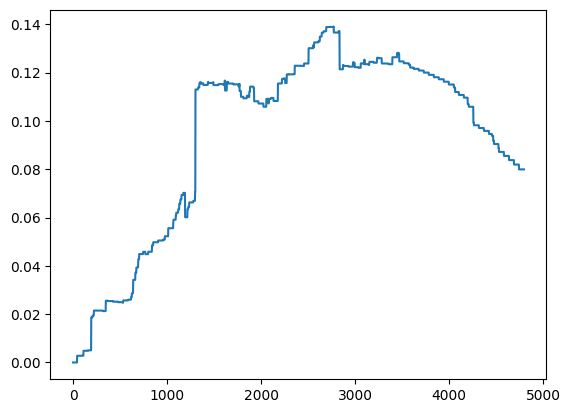

In [17]:
bs_mtlr = _bs_.evaluate(y_test, transformed_predictions_mtlr)
plt.plot(bs_mtlr)

In [18]:
from pysurvival.models.survival_forest import RandomSurvivalForestModel

rsf = RandomSurvivalForestModel(num_trees=50)
rsf.fit(X_train, T_train, E_train, max_features="sqrt", max_depth=5)

RandomSurvivalForestModel

In [19]:
predicted_rsf = rsf.predict_survival(X_test)
transformed_predictions_rsf = fix_predictions(predicted_rsf, rsf.times, int(T_train.max()))

(4795,)


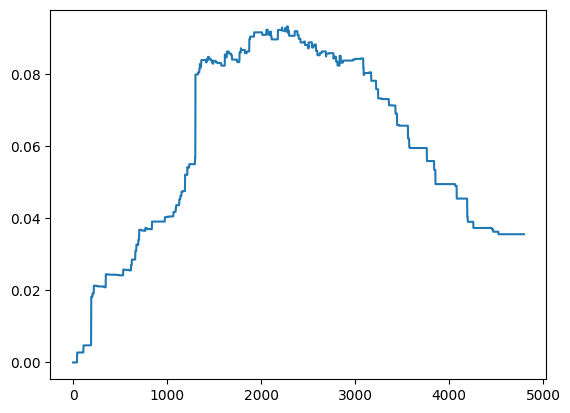

In [20]:
bs_rsf = _bs_.evaluate(y_test, transformed_predictions_rsf)
plt.plot(bs_rsf)

In [19]:
from pysurvival.models.semi_parametric import CoxPHModel

coxph = CoxPHModel()
coxph.fit(X_train, T_train, E_train, lr=0.01, l2_reg=1e-2, init_method='zeros')

Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 714.551 - ||grad||^2 = 404.22307
 * Iteration #2 - Loss = 698.182 - ||grad||^2 = 399.76632
 * Iteration #3 - Loss = 688.456 - ||grad||^2 = 395.63918
 * Iteration #4 - Loss = 679.989 - ||grad||^2 = 391.58569
 * Iteration #5 - Loss = 672.359 - ||grad||^2 = 387.59254
 * Iteration #6 - Loss = 665.347 - ||grad||^2 = 383.65324
 * Iteration #7 - Loss = 658.821 - ||grad||^2 = 379.76382
 * Iteration #8 - Loss = 652.692 - ||grad||^2 = 375.92157
 * Iteration #9 - Loss = 646.897 - ||grad||^2 = 372.12447
 * Iteration #10 - Loss = 641.387 - ||grad||^2 = 368.37093
 * Iteration #11 - Loss = 636.125 - ||grad||^2 = 364.65965
 * Iteration #12 - Loss = 631.082 - ||grad||^2 = 360.98954
 * Iteration #13 - Loss = 626.233 - ||grad||^2 = 357.35965
 * Iteration #14 - Loss = 621.560 - ||grad||^2 = 353.76914
 * Iteration #15 - Loss = 617.044 - ||grad||^2 = 350.21724
 * Iteration #16 - Loss = 612.672 - ||grad||^2 = 346.70326
 * Iteration #17 - Loss = 

CoxPHModel

In [20]:
predicted_coxph = coxph.predict_survival(X_test)
transformed_predictions_coxph = fix_predictions(predicted_coxph, coxph.times, int(T_train.max()))

In [21]:
bs_ipcw_coxph = brier_score_ipcw(T_test, y_test, E_test, transformed_predictions_coxph)

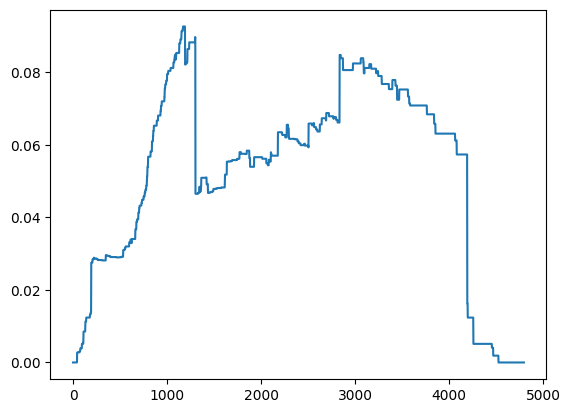

In [22]:
plt.plot(bs_ipcw_coxph)

In [21]:
import spyct

model = spyct.Model()
model.fit(X_train.values, y_train.numpy())

In [22]:
preds_spyct = model.predict(y_test.numpy())

In [23]:
preds_spyct.shape

(84, 4795)

(4795,)


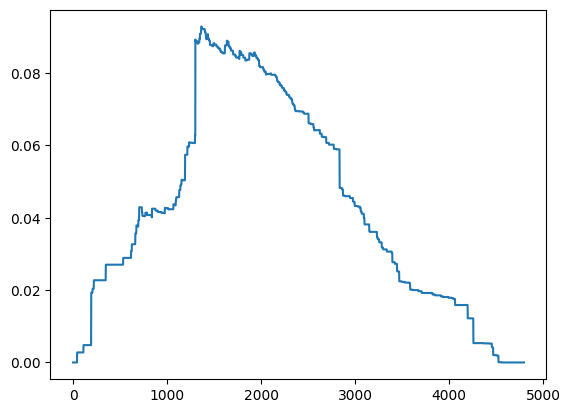

In [24]:
bs_spyct = _bs_.evaluate(y_test, preds_spyct)
plt.plot(bs_spyct)

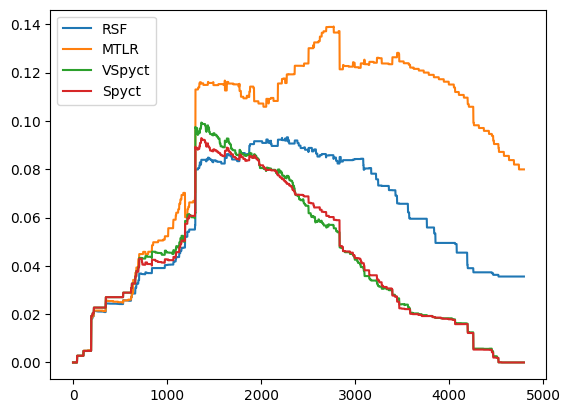

In [25]:
plt.plot(bs_rsf, label='RSF')
plt.plot(bs_mtlr, label='MTLR')
# plt.plot(bs_ipcw_coxph, label='CoxPH')
plt.plot(bs_vspyct, label='VSpyct')
plt.plot(bs_spyct, label='Spyct')
plt.legend()
plt.savefig('../reports/figures/first_brier_scores.pdf', bbox_inches='tight')

Next steps:

1) Adjust the VSpyct model to account for missing target variables. It should work in a SSL manner, same as the original SPYCT - FIXED 
2) Add PyCox models to the game - TODO 
3) Do the evaluations with 5-fold CV - TODO 

In [351]:
def gen_surv_nan(num_samples, num_days=365, missing_prob=0.1, nan_start_day=200):
    num_features = 5  # Replace with the actual number of features

    X = np.random.rand(num_samples, num_features)

    y = np.zeros((num_samples, num_days))
    for i in range(num_samples):
        survival_prob = np.linspace(1, 0, num_days) * np.random.uniform(0.5, 1.5)

        # Introduce missing values after the specified time point
        nan_start_day = min(nan_start_day, num_days)  # Ensure nan_start_day is within the valid range
        missing_indices = np.arange(nan_start_day, num_days)
        y[i, missing_indices] = np.nan

        y[i, :nan_start_day] = survival_prob[:nan_start_day]

    return X, y

def generate_survival_function_data(num_samples, num_days=365):
  X = np.random.rand(num_samples, num_features)  

  y = np.zeros((num_samples, num_days))
  for i in range(num_samples):
    y[i] = np.linspace(1, 0, num_days) * np.random.uniform(0.5, 1.5)

  return X, y

In [160]:
print(fake_weights.shape, y.shape)
print(torch.matmul(fake_weights, y[:,0]))

torch.Size([1000]) torch.Size([1000, 365])
tensor(-6.4459)


In [224]:
def weighted_variance(values, weights, weight_sum):
    mean = torch.matmul(weights, values) / weight_sum
    return -torch.sum(mean*mean)

In [225]:
def wvar(values, weights, weight_sum):
    _list = []
    for i in range(values.shape[1]):
        valid_indices = ~torch.isnan(values[:, i])
        _list.append(torch.matmul(weights[valid_indices], values[valid_indices, i]))
    _list = [z**2 for z in [x/weight_sum.item() for x in _list]]
    return -(sum(_list))

In [347]:
def _wvar(values, weights, weight_sum):
    valid_indices = ~torch.isnan(values)
    weighted_values = values * weights.view(-1, 1)
    weighted_values[~valid_indices] = 0  # Set invalid values to 0
    variance = ((weighted_values.sum(dim=0) / weight_sum) ** 2).sum()
    return -variance

In [353]:
_wvar(y, fake_weights, torch.sum(fake_weights))

tensor(-168.5716)

In [354]:
weighted_variance(y, fake_weights, torch.sum(fake_weights))

tensor(nan)

In [355]:
wvar(y, fake_weights, torch.sum(fake_weights))

tensor(-168.5716)

In [343]:
# Example usage:
num_samples = 1000
num_days = 365
num_features = 10

X, y = generate_survival_function_data(num_samples, num_days=num_days)
X, y = torch.Tensor(X), torch.Tensor(y)

In [352]:
# Example usage:
num_samples = 1000
num_days = 365
num_features = 10

X, y = gen_surv_nan(num_samples, num_days=num_days)
X, y = torch.Tensor(X), torch.Tensor(y)

In [282]:
fake_weights = torch.randn(1000)

In [99]:
y.shape, fake_weights.shape

(torch.Size([1000, 365]), torch.Size([1000]))

In [228]:
print(weighted_variance(y, fake_weights, torch.sum(fake_weights)), wvar(y, fake_weights, torch.sum(fake_weights)))

tensor(-97.7671) tensor(-97.7671)


In [236]:
weighted_variance(y, fake_weights, torch.sum(fake_weights)) - wvar(y, fake_weights, torch.sum(fake_weights))

tensor(1.5259e-05)

In [117]:
wvar(y, fake_weights, torch.sum(fake_weights)).shape

torch.Size([1000])

In [268]:
def impurity(values): return torch.sum(torch.var(values, dim=0))

In [271]:
impurity(y)

tensor(9.8679)

In [274]:
torch.var(y, dim=0).shape

torch.Size([365])

In [304]:
def nanvar(y, dim=0):
    mask = ~torch.isnan(y)
    masked_y = y.masked_fill(~mask, 0)
    masked_mean = masked_y.sum(dim=dim) / mask.sum(dim=dim)
    squared_diff = (masked_y - masked_mean.view(1, -1))**2
    var = torch.sum(squared_diff, dim=dim) / (mask.sum(dim=dim) - 1)
    return var

In [341]:
def _nanvar(y, dim=0):
    mean = torch.nanmean(y, dim)
    squared_diff = (y - mean.unsqueeze(dim)) ** 2
    valid_count = torch.sum(~torch.isnan(y), dim)
    variance = torch.nansum(squared_diff, dim) / (valid_count - 1)
    
    return variance

In [344]:
torch.sum(_nanvar(y)), torch.sum(torch.var(y, dim=0))

(tensor(10.3796), tensor(10.3796))

In [331]:
torch.var(y.numpy(), axis=0)

AttributeError: module 'torch' has no attribute 'nanvar'

In [346]:
_nanvar(y).shape

torch.Size([365])

In [ ]:
# vidi gi posteriorite za root node i sporedi gi so priorite. Kolku se imaat pomesteno?
# proveri deka predictive semplira od posteriorite a ne od nesto drugo
# sporedba posterior na root node na vspyct so root nodovite na site drva od ensemble od originalen spyct